An LNA with noise temperature $T_e$ and gain $G$ is connected to a termination of real impedance $Z_L$ via a transmission line of impedance $Z_0 = 50 \Omega$, length $L$ and velocity factor $v_f$. In addition to adding noise to the input signal which can be measured at the output, the LNA's inpute is a source of noise which sends power down the line. 

This power's reflection off of the load is given as $|\Gamma|^2 = |\frac{Z_L - 50\Omega}{Z_L + 50\Omega} * \text{sin}(\frac{4 \pi L \nu}{v_f c})|^2$ and is 0 for a matched load. See wikipedia/reflection coefficent for a discussion of the sin term, https://en.wikipedia.org/wiki/Reflection_coefficient





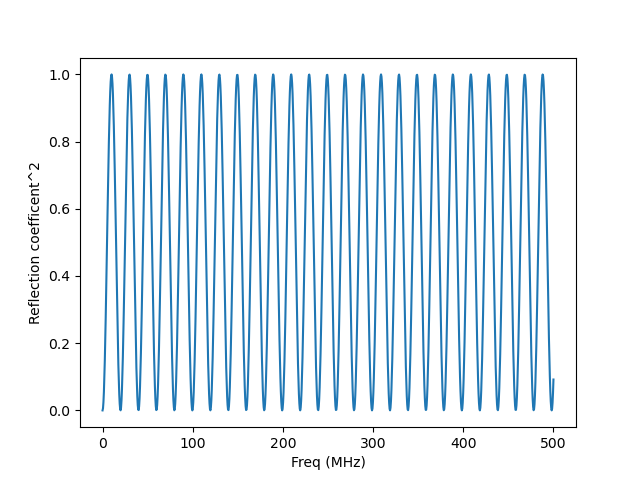

In [100]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

Zl              = 0 # impedance of load, ohms
L               = 6.4 # length of cabel, m
vf              = .85 # velocity factor, v/c

def gammaSq(Zl, L, vf, nu):
    return ((Zl - 50)/(Zl + 50) * np.sin((2 * np.pi * L * nu)/(vf * 3e8)))**2


freqs = np.linspace(0, 500e6, 1000)

plt.close('all')
plt.figure()
plt.plot(freqs/1e6, gammaSq(Zl, L, vf, nu = freqs))
plt.xlabel('Freq (MHz)')
plt.ylabel('Reflection coefficent^2')
plt.show()

The (gain corrected) noise seen at the output of an LNA is given by 
\begin{equation}
P_m/G = P_L + P'_{ai} + P_{ao}
\end{equation} 

Where,
$P_L$ is the noise power of the load, $k*T_L*Z_L*B$.

$P_{ai}$ is the power sourced at the amp's input which is reflected off of the load. I will assume it is thermal and white given by $k*T_{ai}*50 \Omega*B$. note that $P'_{ai} =  |\Gamma|^2 P_{ai}$ 

 $P_{ao}$ is the power the amp adds to the input signal $ k * T_e * 50\Omega * B$, where $T_e = 290K (10^{\text{NF}/10} - 1)$

Normilizing out common terms,

\begin{equation} 
\frac{P_m}{G*B} = k[T_L*Z_L + |\Gamma|^2 * T_{ai} * 50\Omega + 290K (10^{\text{NF}/10} - 1) * 50\Omega]
\end{equation} 

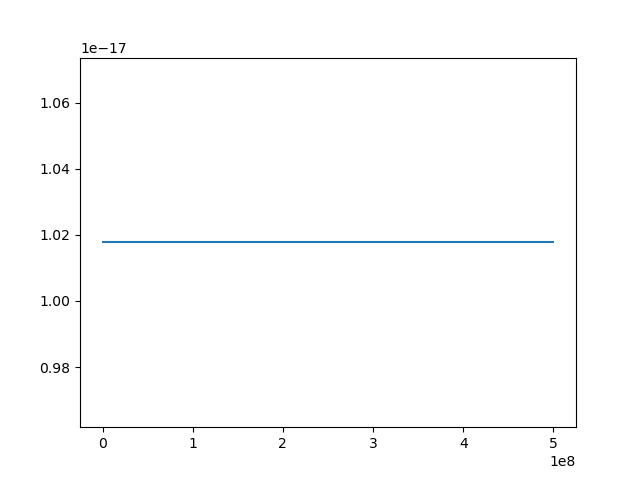

In [87]:
k               = 1.38e-23
B               = 50 # bandwidth, Hz
L               = 6.4 # length of cable, m
vf              = .85 # velocity factor of cable, v/c
Tl              = 295 # temperture of load, kelvin
Zl              = 50 # impedance of load, ohms
Tai             = 310 # temperature of amp input impedance, kelvin
NF              = 0 # noise figure of amp

def PmGainCorr(Tl, Zl, Tai, NF):
    powerArr = np.zeros(len(freqs))
    for i, freq in enumerate(freqs):
        powerArr[i] = k*(Tl * Zl + gammaSq(Zl, L, vf, freq)* Tai * 50 + 290*(10**(NF/10)-1) *50)
    return powerArr

powerArr = PmGainCorr(Tl, Zl, Tai, NF)
#owerdBm = 10*np.log10(powerArr * 1000) + 10*np.log10(B) + 74  
power = powerArr * B

plt.close('all')
plt.figure()
plt.plot(freqs, power)

In [96]:
k               = 1.3806e-23
B               = 50 # bandwidth, Hz
L               = 6.4 # length of cable, m
vf              = .85 # velocity factor of cable, v/c
Tl              = 295 # temperture of load, kelvin
Zl              = 50 # impedance of load, ohms
Tai             = 310 # temperature of amp input impedance, kelvin
NF              = 0 # noise figure of amp

k*(Tl * Zl + gammaSq(Zl, L, vf, 10000)* Tai * 50 + 290*(10**(NF/10)-1) *50)

10*np.log10(k*(Tl  * B ) * 1000)

-156.91140110633532

In [108]:
 10*np.log10(290*(10**(.8/10)-1) *49 *k *1000) + 74

-90.01418528169819